<a href="https://colab.research.google.com/github/arthurlmsantana/performance_sales/blob/main/modelo_reg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das bibliotecas utilizadas:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1) Análise descritiva**

In [ ]:
# Carregando dataframe e verificando a estrutura dos dados da tabela
df = pd.read_csv('MKT.csv', sep=',')
print(df.head(7))
print('-'*40,'\n', df.describe())
print('-'*40,'\n', df.dtypes)

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
5   114.84      1.68       8.88  11.40
6   348.84      4.92      10.20  15.36
---------------------------------------- 
           youtube    facebook   newspaper       sales
count  171.000000  171.000000  171.000000  171.000000
mean   178.021053   27.671579   35.240000   16.922807
std    102.449597   17.913532   24.902918    6.314608
min      0.840000    0.000000    0.360000    1.920000
25%     91.080000   11.700000   13.740000   12.540000
50%    179.760000   26.760000   31.080000   15.480000
75%    262.980000   43.680000   50.880000   20.820000
max    355.680000   59.520000  121.080000   32.400000
---------------------------------------- 
 youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object


Observações:

a) Todos os valores estão em float64.

b) não há valores negativos uma vez que o mínimo de cada coluna é maior do que 0.

c) há pelo menos um valor da coluna em Newspaper que se enquadra como outlier pelo critério de z-score. Portanto é importante investigar essa variável.

In [ ]:
# Avaliando outliers:

df['Z-Score_newspaper'] = (df['newspaper'] - df['newspaper'].mean()) / df['newspaper'].std()
df.sort_values(by=['Z-Score_newspaper'], ascending=False)

,youtube,facebook,newspaper,sales,Z-Score_newspaper
72,355.68,43.56,121.08,28.56,3.446986
46,20.28,52.44,107.28,10.44,2.892834
136,281.40,4.08,101.76,14.28,2.671173
89,150.84,44.28,95.04,19.08,2.401325
112,232.44,42.48,90.72,23.04,2.227851
...,...,...,...,...,...
103,10.08,32.64,2.52,6.84,-1.313902
13,352.32,33.24,2.16,24.84,-1.328358
110,221.88,52.68,2.04,24.84,-1.333177
36,82.80,11.16,1.08,11.16,-1.371727


In [ ]:
# Removendo todos os dados com Z-score acima de 3:

df = df[(df['Z-Score_newspaper'] <= 3) & (df['Z-Score_newspaper'] >= -3)]
df = df.drop('Z-Score_newspaper', axis=1)


In [ ]:
# Sumarização dos dados tratados:

print(df.head(7))
print('-'*40,'\n', df.describe())
print('-'*40,'\n', df.dtypes)

   youtube  facebook  newspaper  sales
0    84.72     19.20      48.96  12.60
1   351.48     33.96      51.84  25.68
2   135.48     20.88      46.32  14.28
3   116.64      1.80      36.00  11.52
4   318.72     24.00       0.36  20.88
5   114.84      1.68       8.88  11.40
6   348.84      4.92      10.20  15.36
---------------------------------------- 
           youtube    facebook   newspaper       sales
count  170.000000  170.000000  170.000000  170.000000
mean   176.976000   27.578118   34.735059   16.854353
std    101.834011   17.924588   24.082520    6.269304
min      0.840000    0.000000    0.360000    1.920000
25%     90.840000   11.610000   13.470000   12.510000
50%    179.700000   26.400000   30.900000   15.480000
75%    261.960000   43.590000   50.040000   20.760000
max    352.320000   59.520000  107.280000   32.400000
---------------------------------------- 
 youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object


# **2) Análise exploratória**

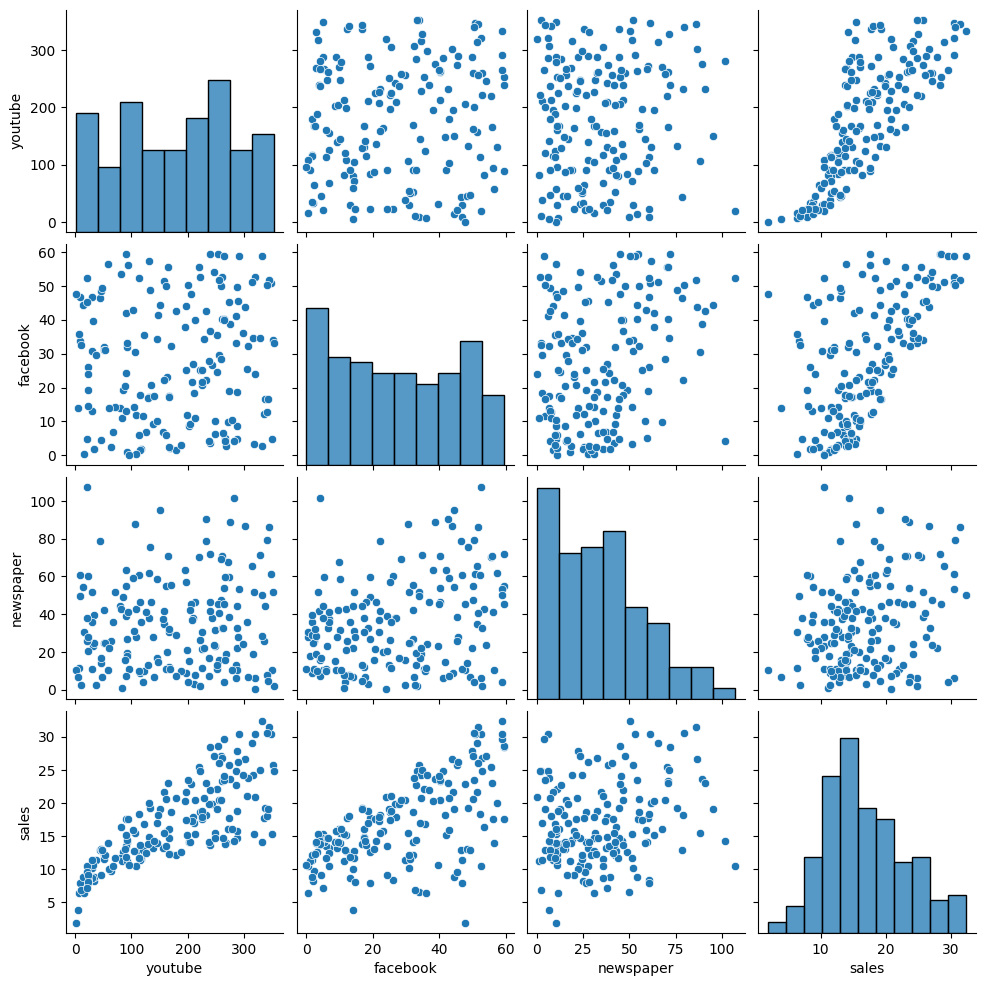

In [ ]:
# Entendendo a distribuição dos dados e possíveis correlações:
sns.pairplot(df)

Observação: O foco do estudo é o 'valor de vendas', que representa a variável dependente. Uma análise inicial sugere uma correlação entre os investimentos em 'youtube' e 'facebook' com as vendas. As demais variáveis, por sua vez, não apresentam correlação aparente entre si, indicando que podem ser consideradas independentes e, portanto, aptas para integrar o modelo

# **3) Modelagem**

Para esse modelo vamos usar da abordagem de regressão linear.

In [ ]:
# Importando bibliotecas do modelo:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Separando as variáveis independentes (X) e dependente (y)
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)


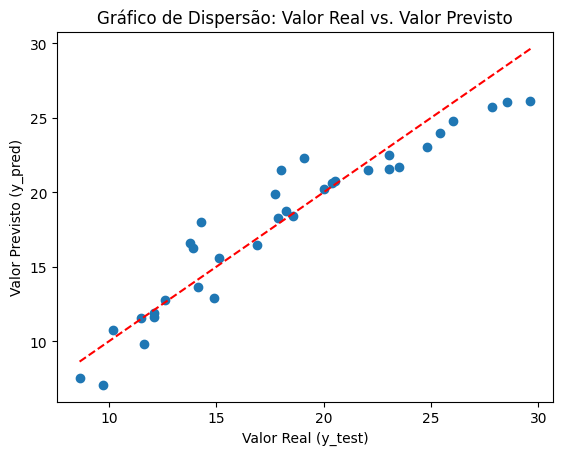

In [ ]:
# Verificando ajuste do modelo com dados de teste (y_pred versus y_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Valor Real (y_test)")
plt.ylabel("Valor Previsto (y_pred)")
plt.title("Gráfico de Dispersão: Valor Real vs. Valor Previsto")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

A comparação visual entre as previsões do modelo e os dados reais indica uma boa aderência, a qual será posteriormente confirmada pelo coeficiente de determinação (R²) apresentado na próxima seção

# **4) Calculando predição**

In [ ]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Imprimindo os coeficientes do modelo
print("Coeficientes do modelo:")
for i, coef in enumerate(model.coef_):
    print(f"{X.columns[i]}: {coef}")
print(f"Intercepto: {model.intercept_}")

Mean Squared Error (MSE): 3.1716399012886756
R-squared (R2): 0.9024782575673262
Coeficientes do modelo:
youtube: 0.046033937669757365
facebook: 0.17743655888991616
newspaper: 0.008462225209977081
Intercepto: 3.486860875294921


O alto valor do coeficiente de determinação (R²) indica uma forte correlação entre o modelo e os dados de teste. Isso sugere que o modelo é capaz de explicar uma grande parte da variabilidade observada nos dados e, portanto, suas previsões, dentro dos limites das variáveis independentes exploradas, demonstram boa aderência aos dados reais

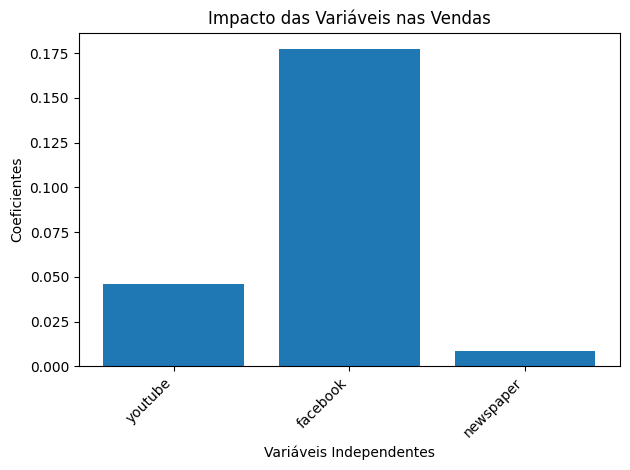

In [ ]:
# Visualizando o coeficiente para cada variável:

coeficientes = model.coef_
nomes_variaveis = X.columns

plt.bar(nomes_variaveis, coeficientes)
plt.xlabel("Variáveis Independentes")
plt.ylabel("Coeficientes")
plt.title("Impacto das Variáveis nas Vendas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Por se tratar de um modelo linear, os coeficientes refletem a influência direta de cada variável independente sobre o valor das vendas. Dessa forma, um coeficiente maior para uma determinada variável indica um maior impacto no retorno do investimento, resultando em um aumento proporcional nas vendas.

Considerando a faixa de investimentos presente no conjunto de dados, o **Facebook** apresenta o maior potencial de retorno, seguido pelo Youtube, enquanto o Newspaper demonstra o menor impacto nas vendas.